<hr style="border:3px solid black"></hr>

# Template for PESLearn to load ML model and create dense PES

    - Read  :  https://github.com/CCQC/PES-Learn
    - Paper :  https://doi.org/10.1021/acs.jctc.9b00312

<hr style="border:3px solid black"></hr>

<hr style="border:2px solid black"></hr>

### Import libraries and prepare input data

    - Example Input  : Make Required changes in the cell as needed. [green]
    - Example Output : Describes the output of the cell. [indigo]

<hr style="border:2px solid black"></hr>

In [1]:
import warnings      # sometimes there are just too many warnings (with conda install)
warnings.filterwarnings("ignore")
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import peslearn        # import PESLearn

<hr style="border:2px solid black"></hr>

### Select path 
<span style="color:green"><u> Example Input _[via code]_ </u></span>
   
    model_path = out_peslearn + 'model1_data/'  
    # change model1_data to model2_data,... etc to load different ML models.
    # Leave default if only 1 model is created using CODE 0.

<hr style="border:2px solid black"></hr>

In [2]:
# select appropriate path and model name (path uses UNIX separator)
input_dir = os.getcwd()+'/'
out_plots = input_dir + 'plots/'
out_data = input_dir + 'data/'
out_peslearn = input_dir + 'peslearn_out/'

model_path = out_peslearn + 'model1_data/'
os.chdir(model_path)

from compute_energy import pes

<hr style="border:2px solid black"></hr>

### Load ML model and test for precision error
#### Use following if you encounter a error regarding precision in the next cell (If there is no error, ignore!) :
***
<span style="color:indigo"><u> Example Output</u></span>
   
      ERROR: "RuntimeError: expected scalar type Double but found Float" ()
      
      This bug is only encountered in NN model (in my Mac/Linux Machines) 
      To solve it: 
      
    (a) open        "compute_energy.py" (file)   -->        "pes" (function/subroutine)
    (b) replace     "E = model(x)"               with       "E = model(x.double())"
        or add line "x = x.double()"             after      "x = torch.Tensor(data=newX)"
        
<span style="color:green">For GP no error is expected!  </span>
<hr style="border:2px solid black"></hr>

In [3]:
# testing for precision error:
cart = np.array([3.5,0,0,0])
Er_test = pes(cart, cartesian=False)  # cartition is false for r/theta r
Er_test

array([[-186.58325347]])

<hr style="border:2px solid black"></hr>

### Plot trial curve
***
<span style="color:green"><u> Example Input _[via code]_ </u></span>
   
      phi_pes    =  0          # Angular coordinate 1 (Phi)
      theta2_pes = 90          # Angular coordinate 2 (Theta 2)
      theta1_pes = 90          # Angular coordinate 3 (Theta 1)
      r_n = 100                # number of radial (R) points with 0.1 Angstrom interval
      R_ini = 2.5              # initial R value (adjust for plot)
      E_inf = -186.5889239     # Asymptotic potential
***
<span style="color:indigo"><u> Example Output</u></span>

    Plots the Potential curve based on above mentioned coordinates. 
    Value of potential minimum (in cm-1)
<hr style="border:2px solid black"></hr>

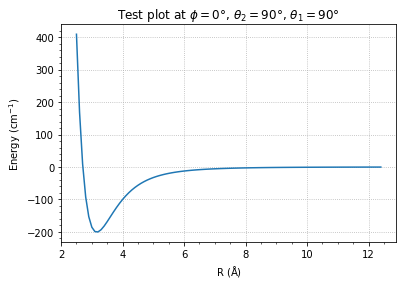

In [4]:
# angular coordinates at which curve needs to be tested
phi_pes = 0
theta2_pes = 90
theta1_pes = 90

r_n = 100 # number of points with 0.1 Ang. interval
R_ini = 2.5 # initial R value (adjust for plot)
E_inf = -186.5889239

b =np.zeros(4) # array with dimentions of input coordinates
e1 = np.zeros(r_n)
r =  np.zeros(r_n)

for i in range (r_n):
    r_pes = ((i/10.0)+R_ini)   
    b =np.array([r_pes,phi_pes,theta2_pes,theta1_pes])
    E = pes(b, cartesian=False)  # cartition is false for r/theta r
    e1[i] = E[0,0]
    r[i] = r_pes

print("Energy minimum at tested curve")
print(min(e2))

# plotting the bayesian/nn learned curve for testing
e2 = (e1-E_inf)*219474.63   # converting to cm-1
x = np.arange(len(e2))/10.0+R_ini
fig, ax = plt.subplots()
plt.plot(x,e2)
plt.grid(True,linestyle=':')
plt.minorticks_on()
plt.ylabel(r'Energy $(\mathrm{cm}^{-1})$')   
plt.xlabel(r'R $\mathrm{(\AA)}$')
plt.title(r'Test plot at $\phi={}\degree$, $\theta_2={}\degree$, $\theta_1={}\degree$'
          .format(int(phi_pes),int(theta2_pes),int(theta1_pes)))
plt.savefig(out_plots + 'ML_PES_curve_test_{}_{}_{}.eps'.format(int(phi_pes),int(theta2_pes),int(theta1_pes)), 
            format='eps')

<hr style="border:2px solid black"></hr>

###  Dense 4D coordinates
***
#### <u> Two Choices for Dense Coordinates</u>:
    
    1) First Time: Run the next tab to generate new coefficients 
    2) Later runs: Skip the next tab to load previously generated coordinates.
<hr style="border:1px solid black"></hr>

#### 1) Use below cell below to create a dense 4D coordinates file
***
    
<span style="color:green"><u> Example Input _[via code]_ </u></span>
   
    r1 = np.arange(2.5,20.1,0.1)                 # Step size to create new radial coordinate    (R)
    for i_phi in tqdm(range (0,91,15)):          # Step size to create new angular coordinate 1 (Phi)
        for j_theta2 in range (0,91,15):         # Step size to create new angular coordinate 1 (Theta2)
            for k_theta1 in range (0,181,15):    # Step size to create new angular coordinate 1 (Theta1)
***
<span style="color:indigo"><u> Example Output</u></span>
    
    Radial  coordinates go from 2.5 to 20.0  Angstroms with step size of 0.1 Angstrom.
    Angular coordinates go from 0 to 90/180  Degrees   with step size of 15 degrees.
    Coordinates are automatically saved to /data/geom_dense.csv
    
    Live: tqdm shows the remaining time!
<hr style="border:1px solid black"></hr>

#### 2) Skip to next cell to load previously created 4D coordinates
<span style="color:green"><u> Example Input _[via code]_ </u></span>
     
     File name : geom_dense.csv    # dense coordinate file name
     Delimiter : ,                 # data separator
***    
If both cell are run, the code will:
    1) first create and save the new coordinates (in geom_dense.csv), and
    2) load the same file (geom_dense.csv) in the next cell without causing any error. 
 However, if you have already created dense coordinates before, 
    it saves time to simply load the previous one!
<hr style="border:2px solid black"></hr>

In [6]:
# template for creating 4D collision coordinates (step size halved to 15 degrees)

A = np.ndarray(shape=(1,4)) # garbage array initialization
r1 = np.arange(2.5,20.1,0.1) 
r_n = len(r1) # saving number of R data points
r4 = np.atleast_2d(r1).T   # creating r column vector
for i_phi in tqdm(range (0,91,15)):
    for j_theta2 in range (0,91,15):
        for k_theta1 in range (0,181,15):
            b = np.array([i_phi,j_theta2,k_theta1])
            c = np.tile(b,(r_n,1))  # creating angles as columns
            d = np.c_[ r4, c ]        # joining r and columns
            A = np.vstack([A, d]) # repeating for different geoms and joining
A = np.delete(A, 0, 0) # deleting first row (empty)
print("Number of data points in the created file : ",len(A))
# save coordinates
np.savetxt(out_data + "geom_dense.csv", A, delimiter=",",fmt='%.1f,%d,%d,%d')

100%|██████████| 7/7 [00:00<00:00, 10.26it/s]


In [7]:
# load coordinates directly from previously saved files

A = np.loadtxt(out_data + "geom_dense.csv", delimiter=",")
print("Number of data points in the loaded file : ",len(A))

112112

<hr style="border:2px solid black"></hr>

### Save the predicted PES (for above coordinates) in "data/E_PESLearn_dense.dat"
<hr style="border:2px solid black"></hr>

In [8]:
predicted_energies = pes(A, cartesian=False)
final_data = np.c_[ A, predicted_energies ]
np.savetxt(out_data + "E_PESLearn_dense.dat", final_data, delimiter=",",fmt='%.2f,%d,%d,%d,%.16f')